In [129]:
# 处理客户档案维护记录，规整后进入customer数据表

from imp4nb import *

df = pd.read_csv('data\\kehudanganweihu.txt',sep=']',header=None,names=['日期','内容'],na_filter=True,skip_blank_lines=True,skipinitialspace=True)
print(df)
dfriqi = df[df['内容'].isnull().values == True]
print(dfriqi)
# print(dfriqi.index.values)
dfriqi['原始索引'] = dfriqi.index
dfriqi.index = range(len(dfriqi))
# print(list(dfriqi['原始索引']))

dfout = df
for i in range(len(dfriqi)):
    dfout.loc[dfriqi['原始索引'][i]:,['日期']]= dfriqi['日期'][i]
    
dfout = dfout[df['内容'].isnull().values == False]
# print(dfout.dtypes)
# print(dfout.columns)
# print(dfout)

dfriqisort = dfriqi.sort_index(ascending=False)
dfriqisort.index = range(len(dfriqisort))
# print(dfriqisort)

dfoutsort = pd.DataFrame()
for i in range(len(dfriqisort)):
    items = dfout[dfout.日期 == dfriqisort['日期'][i]]
    dfoutsort = dfoutsort.append(items)
    
dfoutsort.index= range(len(dfoutsort))
# print(dfoutsort.dtypes)
# print(dfoutsort.columns)
# print(dfoutsort)
# print((dfoutsort['内容'])[15])
# neirong = (dfoutsort['内容'])[15]
# ls = neirong.split('/')
# print(ls)

dfoutsort['n1']=''
dfoutsort['n2']=''
dfoutsort['n3']=''
for i in range(len(dfoutsort)):
    # print((dfoutsort['内容'])[i])
    nrsp = ((dfoutsort['内容'])[i]).split('/')
    # print(nrsp)
    if len(nrsp) == 3:
        dfoutsort.loc[i,['n1','n2','n3']] = nrsp
    elif len(nrsp) == 5:
        dfoutsort.loc[i,['n1','n2','n3']] = [nrsp[0],nrsp[3],nrsp[4]]

print(dfoutsort.dtypes)
print(dfoutsort.columns)
# print(dfoutsort[['n1','n2','n3']])
dfzh = dfoutsort[['n2','n1','n3']]
print(dfzh)
writer = pd.ExcelWriter('data\\结果输出.xlsx')
dfzh.to_excel(writer,sheet_name='档案整理')

writer.close()

              日期                                                 内容
0    2017年10月18日                                                NaN
1           1、[   05300750000SXXD/水果大卖场（湖大对面） 13125123985/改成/水果大...
2           2、[                02400690000SXXD/老江南超市 13397121995/新店
3           3、[                 08400580000SXXD/烟云酒阁 15308636582/新店
4    2017年10月17日                                                NaN
5           1、[                   07100070000PXXD/星沙 13507142931/新店
6           2、[             23200320060S17D/芙蓉兴盛锦琴超市 15717115042/新店
7    2017年10月14日                                                NaN
8           1、[           34100770100SXXD/芙蓉兴盛（世纪龙城） 13871537746/新店
9           2、[   05100800000CXXD/徐氏炒货 18627972397/改成/山东炒货（徐氏） 1...
10          3、[   34100180080SXXD/弘旺超市 84620091/改成/Family52弘旺超市 ...
11          4、[   05300780000CXXD/山东炒货 15972995695/改成/山东炒货（东亭路） ...
12          5、[   05300750000SXXD/三高水果大卖场 13125123985/改成/水果大卖场（湖...
13          6、[   25100880000SXXD/每天惠（城市广场店） 134

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [130]:
# 数据验证周全性

from imp4nb import *

cnx = lite.connect('data\\quandan.db')
df = pd.read_sql_query('select xiaoshoumingxi.商品全名,product.* from xiaoshoumingxi left outer join product on '
                       'xiaoshoumingxi.商品全名 = product.商品全名 where product.商品全名 is null',cnx)
df.describe()
print(df)

df = pd.read_sql_query('select xiaoshoumingxi.单位全名,customer.* from xiaoshoumingxi left outer join customer on '
                       'xiaoshoumingxi.单位全名 = customer.往来单位 where customer.往来单位 is null',cnx)
df.describe()
df = df.groupby('单位全名').sum()
print(len(df))
print(df)

Empty DataFrame
Columns: [商品全名, index, 商品全名, 条码, 分析编码, 品牌分类, 品牌名称, 重点品项, 推广等级, 单价]
Index: []


0
Empty DataFrame
Columns: [index, 往来单位, 往来单位编号, 地址]
Index: []


In [9]:
# 统计品牌销售
from imp4nb import *

cnx = lite.connect('data\\quandan.db')
df = pd.read_sql_query(
                    "select 日期,xiaoshoumingxi.单位全名 as 客户名称,customer.往来单位编号 as 编号,金额,substr(customer.往来单位编号,1,2) as 区域 ,"
                    "substr(customer.往来单位编号,12,1) as 类型,product.品牌名称  as 品牌 from xiaoshoumingxi,"
                    "customer,product where (customer.往来单位 = xiaoshoumingxi.单位全名) "
                    "and (product.商品全名 = xiaoshoumingxi.商品全名)" , cnx)
# df.index = df['日期']
# df = df[df.区域.isin(('33','34'))]
df = df.groupby('品牌').sum()
df = df.sort_values('金额',ascending=False)
print(type(df))
df.head(10)

<class 'pandas.core.frame.DataFrame'>


,金额
品牌,
创食人,2.696152e+07
劲仔,1.061788e+07
渔米之湘,2.906594e+06
醉吃香,2.359339e+06
新丰园,1.213056e+06
抓鱼的猫,1.060037e+06
卫龙,9.972528e+05
旭东,7.089759e+05
有友,6.812354e+05


日期      object
销售额    float64
dtype: object
Index(['日期', '销售额'], dtype='object')
float64
<class 'pandas.core.series.Series'>


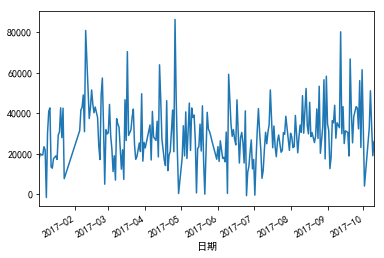

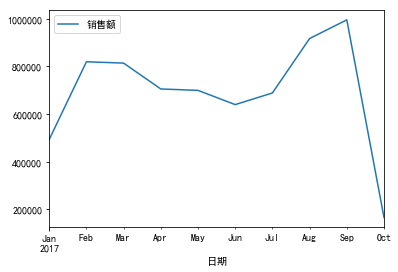

In [131]:
# 

from imp4nb import *

# plot中显示中文
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False

conn = lite.connect('data\\quandan.db')
cursor = conn.cursor()
# df = pd.read_sql('select max(日期) as 日期 from xiaoshoumingxi',conn)
# print(df)
df = pd.read_sql('select 日期,sum(金额) as 销售额 from xiaoshoumingxi group by 日期', conn)
df = df[df.日期 > '2017-01-01']
df.index = pd.to_datetime(df['日期'])
print(df.dtypes)
print(df.columns)
ds = df['销售额']
print(ds.dtypes)
print(type(ds))
# print(ds)
ds.plot()
df = df.resample('M').sum()
df.plot()
plt.show()
plt.close()

conn.close()

In [5]:
# 叁拾叁区、叁拾肆区，随机200家客户
import pandas as pd, sqlite3 as lite, matplotlib.pyplot as plt, numpy as np,calendar
import random as rd
from pylab import *
from tempfile import NamedTemporaryFile

cnx = lite.connect('data\\quandan.db')
# df = pd.read_sql_query(
#                     "select 日期,xiaoshoumingxi.单位全名 as 客户名称,customer.往来单位编号 as 编号,金额,substr(customer.往来单位编号,1,2) as 区域 ,"
#                     "substr(customer.往来单位编号,12,1) as 类型,product.品牌名称  as 品牌 from xiaoshoumingxi,"
#                     "customer,product where (customer.往来单位 = xiaoshoumingxi.单位全名) "
#                     "and (product.商品全名 = xiaoshoumingxi.商品全名)" , cnx)
df = pd.read_sql_query(
                    "select xiaoshoumingxi.单位全名 as 客户名称,customer.往来单位编号 as 编号,customer.地址 as 地址,sum(金额) as 销售额,substr(customer.往来单位编号,1,2) as 区域 from xiaoshoumingxi,"
                    "customer,product where (customer.往来单位 = xiaoshoumingxi.单位全名) "
                    "and (product.商品全名 = xiaoshoumingxi.商品全名) group by 编号 order by 编号" , cnx)
# df.index = df['日期']
df = df[df.区域.isin(('33','34'))]
df.index = range(len(df))
ls = range(500)
randomls = rd.sample(ls,200)
df = df.loc[randomls,['客户名称','地址']]

df.to_excel('data\\结果输出.xlsx',sheet_name='汉阳客户清单')  

print(df)

                           客户名称                          地址
284      慕臣（纽宾凯国际社区）13971374088                        None
345           美福达超市 15871760236            汉阳大道罗七路代李湾尚鼎轩酒店旁
493           筱玫瑰超市 13797095504        玫瑰街和金龙路十字向东（520酒店旁边）
279      可多（十里新城后门） 15972924390                    中大十里新城后门
476           花园湾服饰 13207125718                  汉阳大道花园湾59号
33      芙蓉兴盛汇福园（原旺达副食） 84641653                        None
90                永昌副食 84510421                 鹦鹉大道洲头五路交汇处
42             副食商店 15971420704                       正虹饲料旁
41             迎春超市 15727036855           新天大道军工社区零二小区491附2
400         江汉苑美林超市 15202711815              汉阳琴台大道永丰街江汉苑小区
145                  阿里之门（邓甲菜场）                    菜场邓甲生鲜市场
149          可多超市（建港店） 51478081                      倒口南村巷内
220               家仁超市 84464616                 汉阳芳草路世纪龙城小区
344     佳家宜超市（楚才小学） 17786474385                        None
377        可多（铁桥广场） 13477032599                        None
436       平价超市（小网吧） 15007176828         

In [38]:
# 整理并导入原始数据
import pandas as pd, sqlite3 as lite, numpy as np

# 2017.8.29-2017.9.30职员销售明细表.xls
# 2017.10.1-2017.10.10职员销售明细表.xls
df = pd.read_excel('data\\2017.10.1-2017.10.10职员销售明细表.xls.xls',sheetname='2017.10.1-2017.10.10职员销售明细表.xls',index_col=0)
# print(df.columns)
# print(df.dtypes)
df['职员名称'] = None
df=df.loc[:,['日期','单据编号','单据类型','职员名称','摘要','备注','商品备注','商品编号','商品全名',
             '单价','单位','数量','金额','单位全名','仓库全名','部门全名']]
df['日期'] = pd.to_datetime(df['日期'])
df['备注'] = df['备注'].astype(object)
# print(df.columns)
# print(df.dtypes)
# print(len(df))
dfdel = df[(df.单位全名.isnull().values==True) & ((df.单据编号.isnull().values == True) |  (df.单据编号 =='小计') |  (df.单据编号 =='合计'))]
hangdel = list(dfdel.index)
# print(hangdel)
# print(dfdel)
df1 = df.drop(hangdel)
# print(df1.columns)
# print(len(df1))
# print(df1)
dfzhiyuan = df1[df1.单位全名.isnull().values == True]
# print(len(dfzhiyuan))
# print(dfzhiyuan)
zyhang = list(dfzhiyuan.index)
zyming = list(dfzhiyuan['单据编号'])
# print(zyhang)
# print(zyming)
for i in range(len(zyhang)):
    df.loc[zyhang[i]:,'职员名称'] = zyming[i]
    
dfdel = df[df.单位全名.isnull().values==True]
print(dfdel[['日期','单据编号','数量','金额']])
hangdel = list(dfdel.index)
print(hangdel)
df2 = df.drop(hangdel)
# print(df2.dtypes)
# print(df2.columns)
# print(len(df2))
# print(df2)
df2.index = range(len(df2))
# del df[行号]
# print((df2[df2.商品备注.isnull().values == False])[['日期','职员名称','单位全名','金额','单据编号','摘要','商品备注']])
# print((df2[df2.日期 == pd.to_datetime('2017-09-09')])[['日期','职员名称','单位全名','金额','单据编号','备注','商品备注']])
# cnx = lite.connect('data\\quandan.db')
# df2.to_sql(name='xiaoshoumingxi', con=cnx, if_exists='append', chunksize=10000)

      日期 单据编号        数量         金额
行号                                
1    NaT  梅富忠       NaN        NaN
915  NaT   小计   16183.0   20798.46
916  NaT  NaN       NaN        NaN
917  NaT  耿华忠       NaN        NaN
1125 NaT   小计   85318.0   64627.87
1126 NaT  NaN       NaN        NaN
1127 NaT  徐志伟       NaN        NaN
1711 NaT   小计   11361.0   14019.75
1712 NaT  NaN       NaN        NaN
1713 NaT   陈威       NaN        NaN
2533 NaT   小计   20525.0   22646.79
2534 NaT  NaN       NaN        NaN
2535 NaT   周莉       NaN        NaN
2705 NaT   小计    5993.0    7083.00
2706 NaT  NaN       NaN        NaN
2707 NaT  王家龙       NaN        NaN
3009 NaT   小计    7822.0   10891.05
3010 NaT  NaN       NaN        NaN
3011 NaT  胡明景       NaN        NaN
3581 NaT   小计   15393.2   16012.71
3582 NaT  NaN       NaN        NaN
3583 NaT  朱经伦       NaN        NaN
3896 NaT   小计    8306.0   10254.30
3897 NaT  NaN       NaN        NaN
3898 NaT   合计  170901.2  166333.93
[1, 915, 916, 917, 1125, 1126, 1127, 1711, 1712, 1713, 